<a href="https://colab.research.google.com/github/Qisam0322/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Sam Qi

## Project Overview

- The 'Prediction of Product Sales' project uses predictive analytics to forecast sales and improve inventory management, pricing strategies, and product placement optimization for retail stores. It provides data-driven insights and recommendations to enhance decision-making and increase profitability.

## Load and Inspect Data

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
fname='/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
import pandas as pd
df=pd.read_csv(fname)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

In [91]:
#1) How many rows and columns?
# There are 8523 rows and 12 columns.

#2)What are the datatypes of each variable?
df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Addressing duplicates

In [92]:
df.duplicated()
df.duplicated().sum()

0

### Identify missing values

In [93]:
null_sum=df.isna().sum()
null_percentage=null_sum/len(df)*100
null_percentage

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [94]:
null_percentage[null_percentage>0]

Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64

### Address the missing values by using a placeholder value

In [95]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [96]:
#check statistic of 'Item_Weight' since there is 17% of null in 'Item_Weight'
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [97]:
#choose to use .median as a placeholder because after replacing null with .median
# The mean and std did not change much and Min, Max, and median stayed the same.
#df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].median())
#df['Item_Weight'].describe()

In [98]:
# Check for Null after filling null with 'median'
df['Item_Weight'].isna().sum()

1463

In [99]:
# Inspecting column 'Outlet_Size'.
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [100]:
#Categorical column, decided to use work 'MISSING' as a placeholder to fill Null.
#df['Outlet_Size']=df['Outlet_Size'].fillna('MISSING')
#df['Outlet_Size'].value_counts()


In [101]:
# Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Find and fix any inconsistent categories of data

In [102]:
string_cols=df.select_dtypes('object').columns
for col in string_cols:
  print(f'Value count for {col}')
  print(df[col].value_counts())
  print('\n')


Value count for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value count for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value count for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value count for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT0

In [103]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [104]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Summary Statistics for Numeric Features

In [105]:
stat=df.describe()
stat.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Rename the columns

In [106]:
name_dic={'Item_Identifier':'ProductID', 'Item_Weight':'Weight of product',
          'Item_Fat_Content':'low fat or regular','Item_Type':'category',
          'Item_MRP':'Max Retail Price', 'Outlet_Identifier':'StoreID',
          'Item_Outlet_Sales':'Product store sales','Outlet_Establishment_Year':'Year store established',
          'Outlet_Size':'Size of the store','Outlet_Location_Type':'Outlet Location Type','Outlet_Type':'Outlet Type','Item_Visibility':'The % of total display area'}

In [107]:
df=df.rename(name_dic,axis=1)
df.head()

,ProductID,Weight of product,low fat or regular,The % of total display area,category,Max Retail Price,StoreID,Year store established,Size of the store,Outlet Location Type,Outlet Type,Product store sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis

In [108]:
#import liberaries and packages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Heatmap to view the correlation between features.

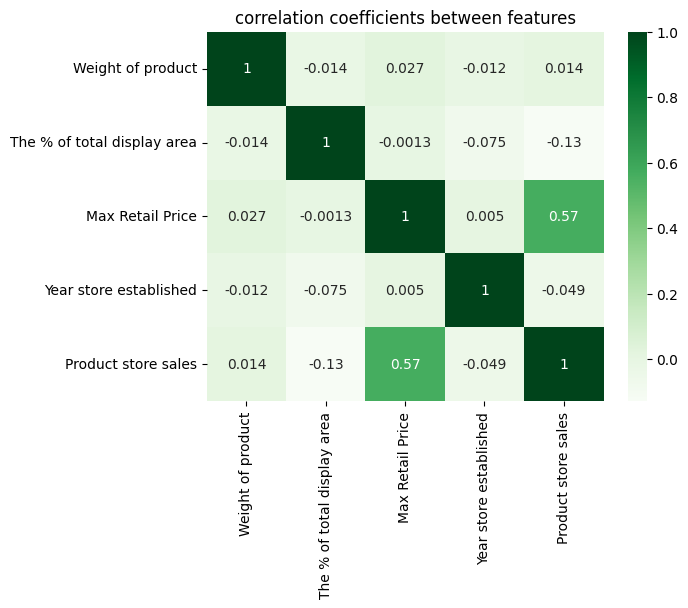

In [109]:
corr=df.corr(numeric_only=True)
ax=sns.heatmap(corr,annot=True,cmap='Greens')
ax.set_title('correlation coefficients between features');

- From the graph, only Product store sales and Max retail price seems to have a positive correlation of 0.57.

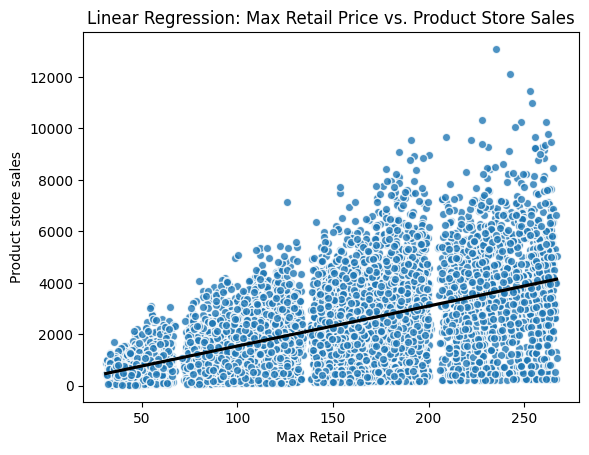

In [110]:
line_kws=dict(color='black')
scatter_kws=dict(edgecolor='white')
ax=sns.regplot(data=df,x='Max Retail Price',y='Product store sales',line_kws=line_kws,scatter_kws=scatter_kws)
ax.set_title('Linear Regression: Max Retail Price vs. Product Store Sales');

- From the regplot, there is a positive correlation pattern between Max Retail price and Product store sales. The correlation is moderate; There is no noticable correlation (>0.3 or <-0.3) other than the two features mentioned above.

### Countplots to view the frequency of each class of categorial features in your dataset.

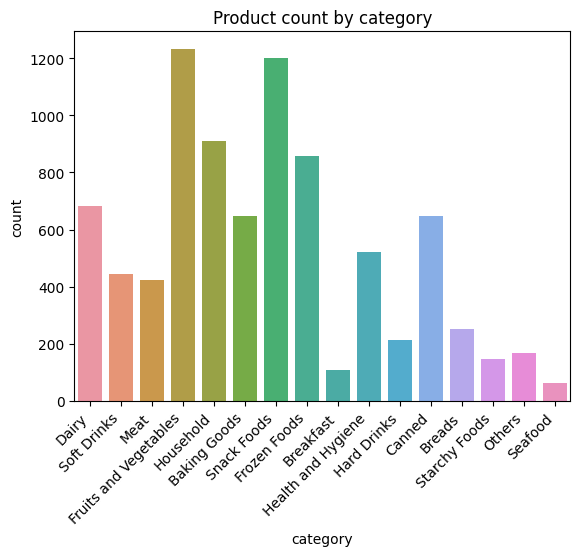

In [111]:
ax=sns.countplot(data=df,x='category')
ax.tick_params(axis='x',rotation=45)
plt.xticks(ha='right');
ax.set_title('Product count by category');

- The countplot above shows the product counts for each category. 'Fruit and vegetable' and 'snake foods' have the highest counts of product and 'seafood' has the lowest count of product.

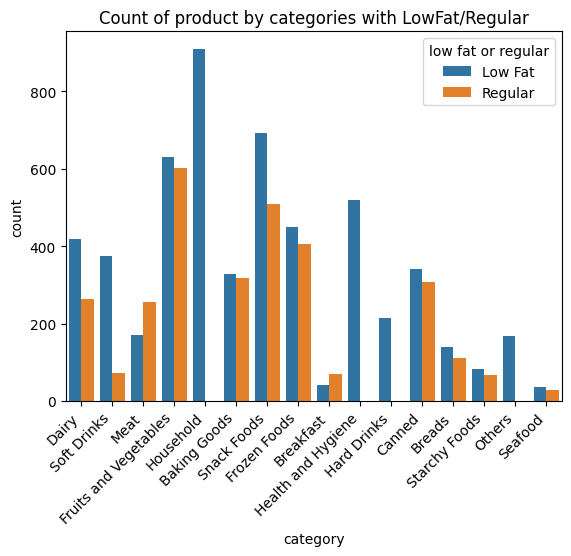

In [112]:
ax=sns.countplot(data=df,x='category',hue='low fat or regular')
ax.tick_params(axis='x',rotation=45)
plt.xticks(ha='right');
ax.set_title('Count of product by categories with LowFat/Regular');

- The countplot above give me some insights on product count of each category seperated by LowFat/Regular. In general the company has more low fat product (product count not types of product )in stores than regular product but for 'meat' and 'breakfast' categories the company has more regular product than low fat product.

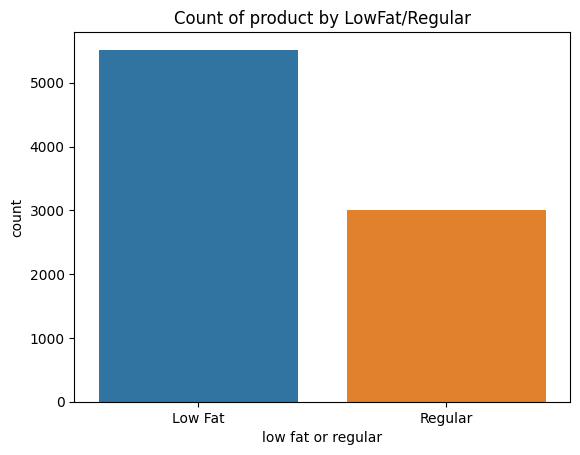

In [113]:
ax=sns.countplot(data=df,x='low fat or regular')
ax.set_title('Count of product by LowFat/Regular');

- This countplot shows low fat products has higher product count than regular product.

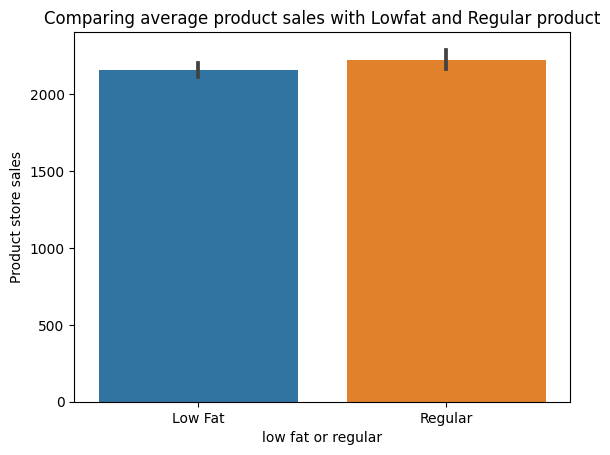

In [114]:
ax=sns.barplot(data=df,x='low fat or regular',y='Product store sales')
ax.set_title('Comparing average product sales with Lowfat and Regular product');

- This barplot shows the average product store sales is higher for regular products than low fat products.

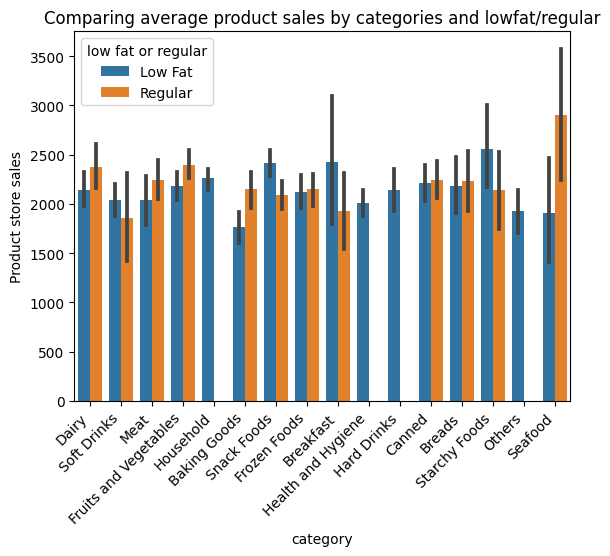

In [115]:
ax=sns.barplot(data=df,x='category',y='Product store sales',hue='low fat or regular')
ax.set_title('Comparing average product sales by categories and lowfat/regular')
ax.tick_params(axis='x',rotation=45)
plt.xticks(ha='right');

- Upon further investigation, regular product has a higher average product store sales in some categories. Regular seafood products have the highest average product store sales.

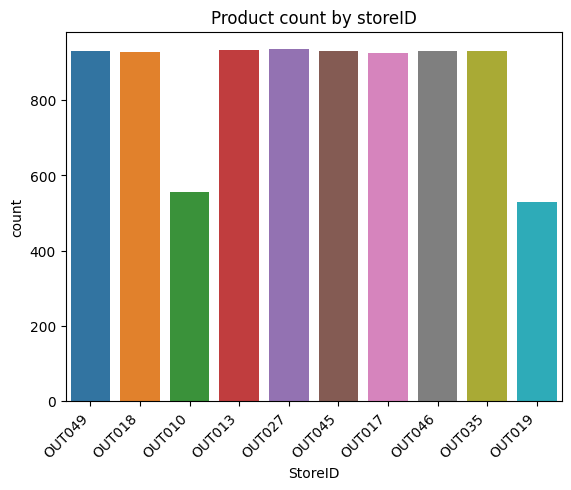

In [116]:
ax=sns.countplot(data=df,x='StoreID')
ax.tick_params(axis='x',rotation=45)
plt.xticks(ha='right');
ax.set_title('Product count by storeID');

- Most the stores has similar amount of products except for storeID OUT010 and OUT019.

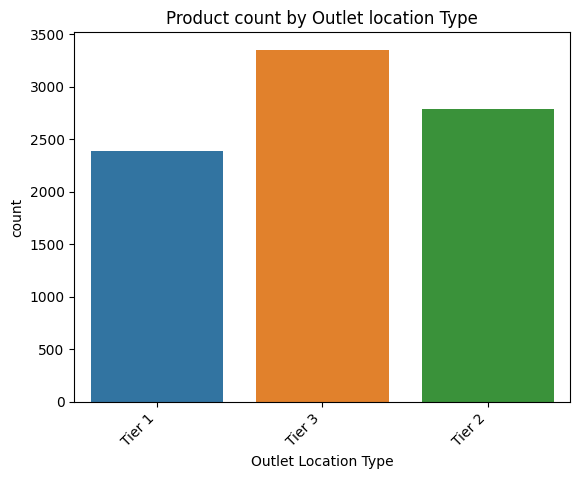

In [117]:
ax=sns.countplot(data=df,x='Outlet Location Type')
ax.tick_params(axis='x',rotation=45)
plt.xticks(ha='right');
ax.set_title('Product count by Outlet location Type');

- Outlet location tier 3 has the highest product count, followed by tier 2. Tier 1 has the loweres product count.

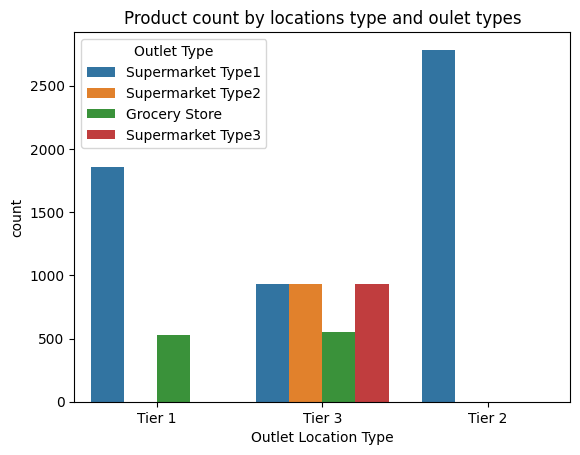

In [118]:
ax=sns.countplot(data=df,x='Outlet Location Type',hue='Outlet Type')
ax.set_title('Product count by locations type and oulet types');

- From the countplot above, only tier 3 location has all 4 types of outlets, tier 2 location only has supermarket type 1.

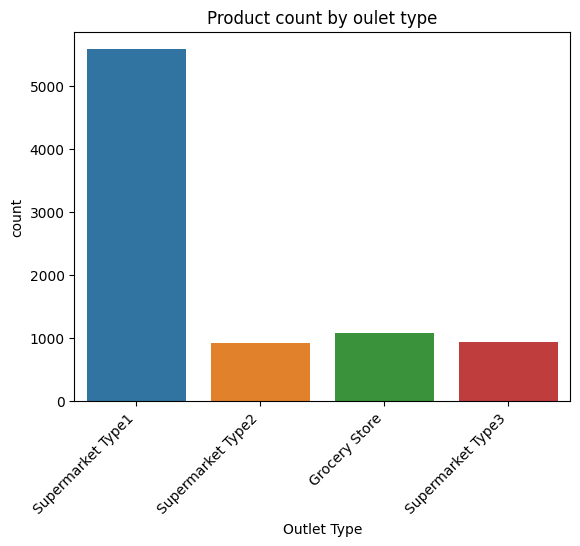

In [119]:
ax=sns.countplot(data=df,x='Outlet Type')
ax.set_title('Product count by oulet type')
ax.tick_params(axis='x',rotation=45)
plt.xticks(ha='right');

- Supermarket Type 1 has much higher product counts than the other 3 types of stores.

### Histograms to view the distributions of numerical features in your dataset.

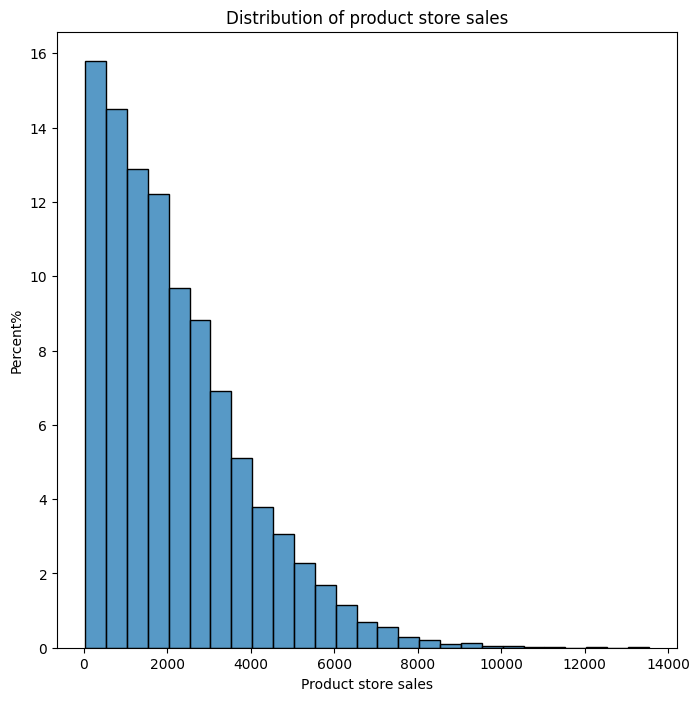

In [120]:
fig,ax=plt.subplots(figsize=(8,8))
ax=sns.histplot(data=df,x='Product store sales',stat='percent',binwidth=500,ax=ax)
ax.set_title('Distribution of product store sales')
ax.set_xlabel('Product store sales')
ax.set_ylabel('Percent%');

- By looking at the histplot above, Product store sales between $0 to $500 has almost 16% of the total product count. Percentage of total product count decrease as product store sales increase.

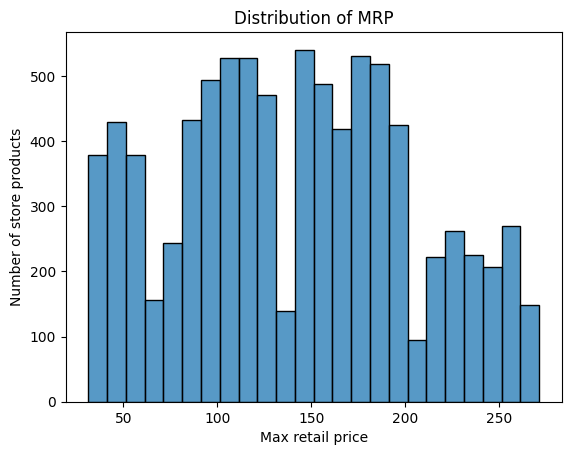

In [121]:
ax=sns.histplot(data=df,x='Max Retail Price',binwidth=10)
ax.set_title('Distribution of MRP')
ax.set_xlabel('Max retail price')
ax.set_ylabel('Number of store products');

- This histplot above shows the distribution of Max retail price. It is hard to tell between which MRP range has the most product count since there are few price ranges are very close.

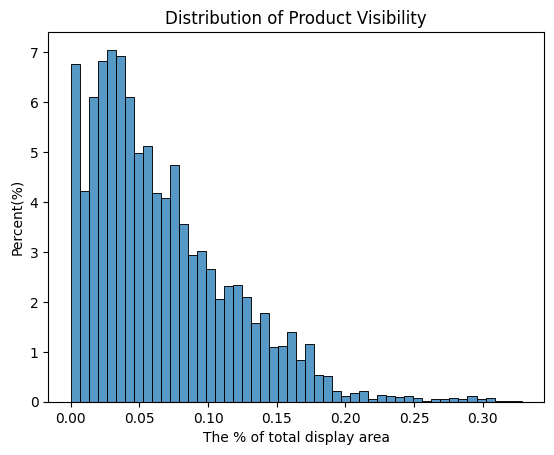

In [122]:
ax=sns.histplot(data=df,x='The % of total display area',stat='percent')
ax.set_title('Distribution of Product Visibility')
ax.set_ylabel('Percent(%)');

- From the graph above, product visibility of ~0.025-0.04 has the higest percentage of product counts. product visibility range from ~0 to 0.06 has the majority of the product count.

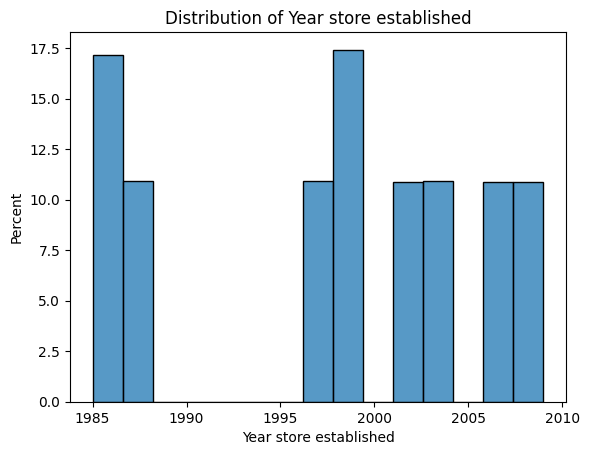

In [123]:
ax=sns.histplot(data=df,x='Year store established',bins='auto',stat='percent')
ax.set_title('Distribution of Year store established');


- Store established between 1985 to 1987, and 1998 to 2000 each has 17% of the total product count.Only about 20% of the product were sold at store established after 2005.

### Boxplots to view statistical summaries of numerical features in your dataset.


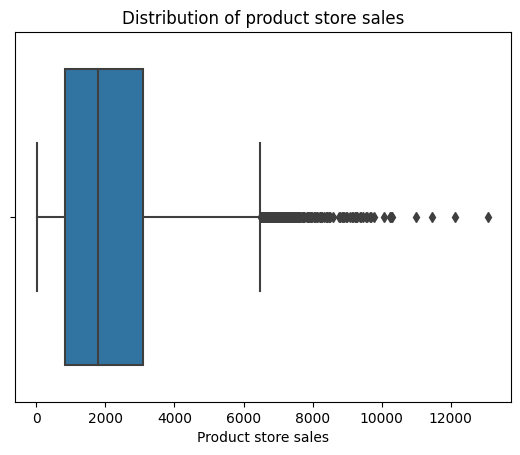

In [124]:
ax=sns.boxplot(data=df,x='Product store sales')
ax.set_title('Distribution of product store sales');

- The distribution of the product store sales shows that 50% of the product sales are around 1000 to 3000 with the median being around 1900. 25% of product sales fall between 0 to 1000.Noticed there are outliers on the high side.

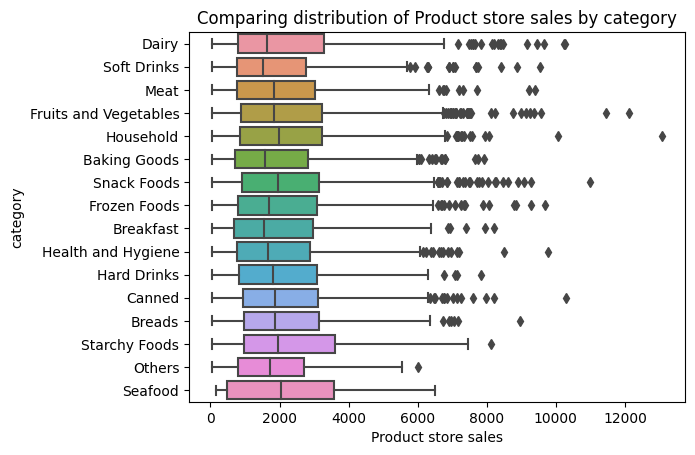

In [125]:
ax=sns.boxplot(data=df,x='Product store sales',y='category')
ax.set_title('Comparing distribution of Product store sales by category');

- Comparing distributions of store sales by categories.


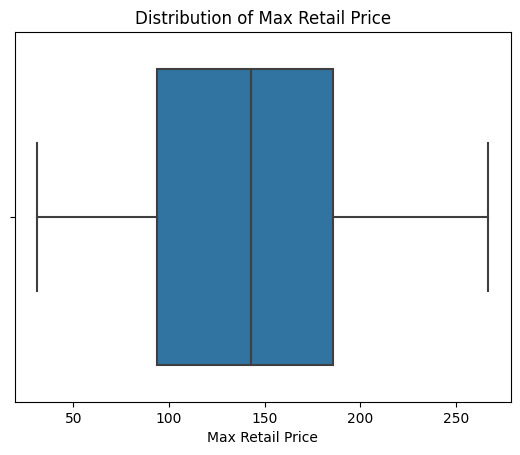

In [126]:
ax=sns.boxplot(data=df,x='Max Retail Price')
ax.set_title('Distribution of Max Retail Price');

- 50% of the product's MRPs are in the range between 90 to 180.


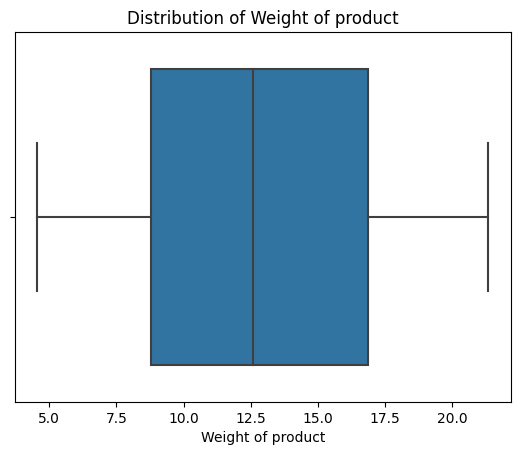

In [127]:
ax=sns.boxplot(data=df,x='Weight of product')
ax.set_title('Distribution of Weight of product');

- Null values in 'weight of product' has been replaced by the median. This might affect the outcome of the result. 50% of the product has the weight betwwen 9 to 16.

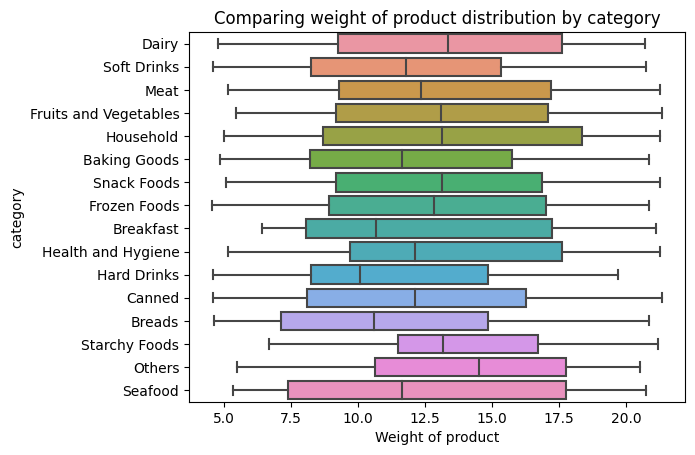

In [128]:
ax=sns.boxplot(data=df,x='Weight of product',y='category')
ax.set_title('Comparing weight of product distribution by category');

- Comparing distribution of product weights among categories.


## Feature Inspection

### EDA Functions

- UNIVARIATE PLOTTING FUNCTIONS FOR EDA

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  temp_df = df.copy()
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100

  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  fig, ax = plt.subplots(figsize=figsize)
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)

  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  ax.set_title(f"Column: {x}")

  fig.tight_layout()
  plt.show()

  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  val_counts = temp_df[x].value_counts(dropna=False)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = freq / len(temp_df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



In [130]:
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

- MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET

In [131]:
def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  temp_df = df.copy()

  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  else:
    temp_df = temp_df.dropna(subset=[x])

  fig, ax = plt.subplots(figsize=figsize)

  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)

  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax



In [132]:
def plot_numeric_vs_target(df, x, y='SalePrice', figsize=(6,4), **kwargs):

  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs)

  ax.set_title(f"{x} vs. {y} (r = {r})")

  plt.show()
  return fig, ax



### Weight of product

- Weight of product: Product weight


In [133]:
#check dtype
feature = "Weight of product"
df[feature].dtype

dtype('float64')

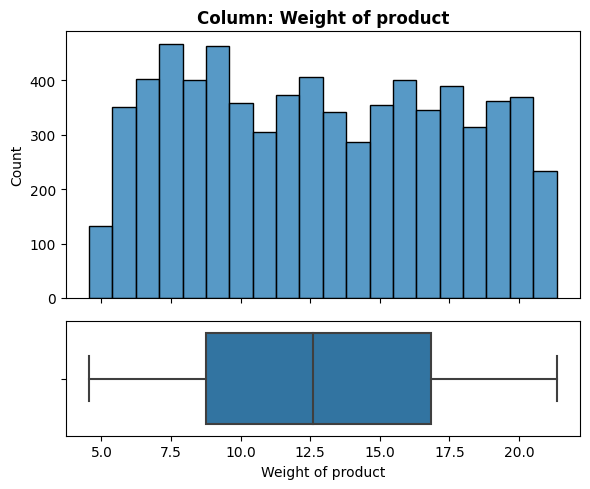

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [134]:
#Plot numerical exploration EDA function
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 Null values found (17.17%)
  - Unable to find the cause of NaN
  - Null missing at ramdom
  - Impute with median

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



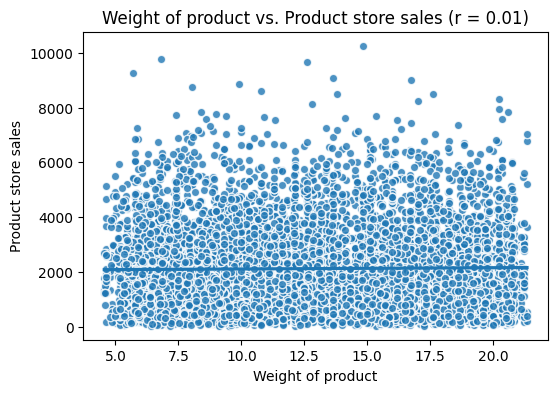

In [135]:
#Plot Numeric VS TARGET EDA function
plot_numeric_vs_target(df,feature,'Product store sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - I expect the weight of the product has nothing to do with product sales.

  - Does this feature appear to be a predictor of the target?
    - No, The correlation between 'Weight of product' and 'Product store sales' is 0.01. There is no relationship between the two feature. 'Weight of product is not a predictor of the target.
___

### Low fat or regular

- Low fat or regular: Whether the product is low-fat or regular


In [136]:
#check dtype
feature = "low fat or regular"
df[feature].dtype

dtype('O')

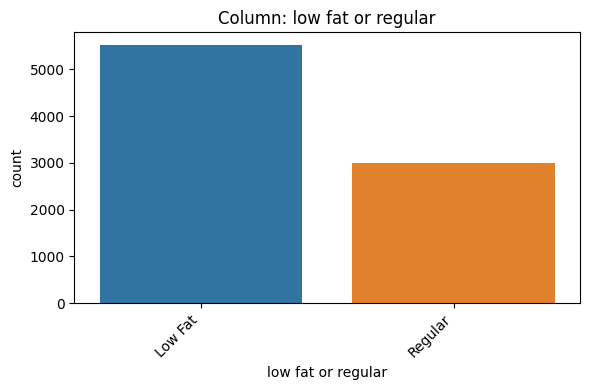

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [137]:
#Plot categorical exploration EDA function
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 Null value found
  - Nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 2 unique categories.
  - Very low (>10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



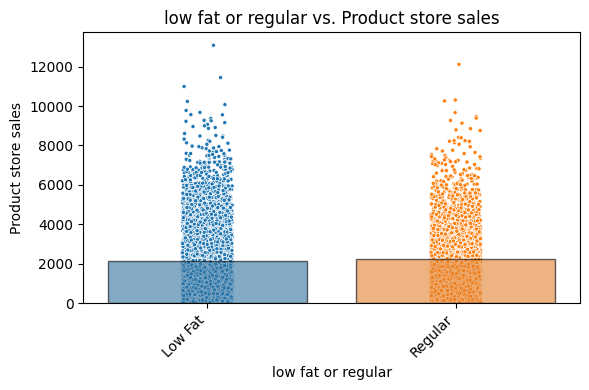

In [138]:
#Plot categorical VS TARGET
plot_categorical_vs_target(df,feature,'Product store sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I expect customer prefer heathy product (low fat), therefore the product sales of low fat product should be higher.

  - Does this feature appear to be a predictor of the target?
    - No, The average product sales for low fat and regular product are very close, the range of values for both low fat and regular product extends below and above other category.

___

### The % of total display area

- The % of total display area: The percentage of total display area of all products in a store allocated to the particular product

In [139]:
#check dtype
feature = "The % of total display area"
df[feature].dtype

dtype('float64')

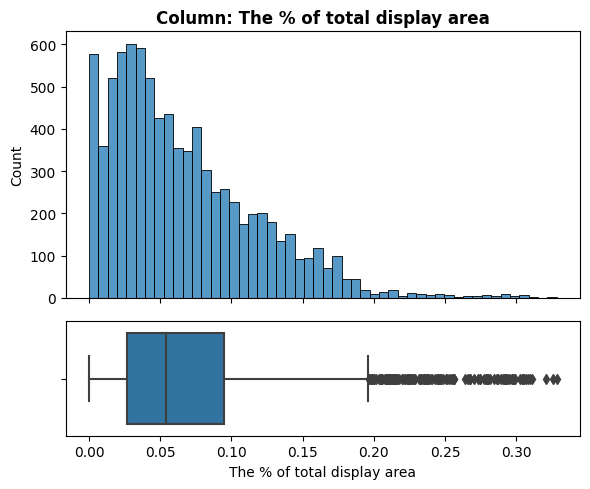

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [140]:
#Plot Numerical exploration EDA function
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 Null value found
  - Nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



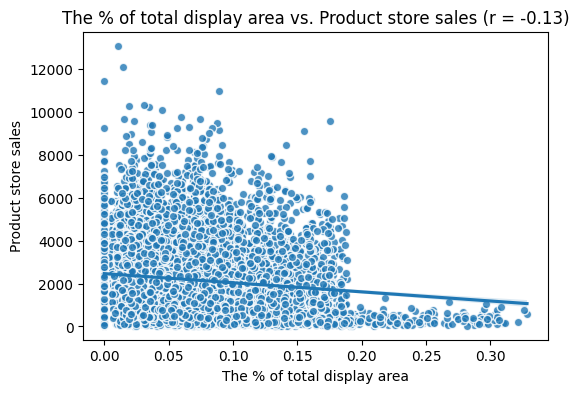

In [141]:
#Plot numerical VS TARGET EDA function
plot_numeric_vs_target(df,feature,'Product store sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I expect the higher visibility of the product would result in higher product sales.

  - Does this feature appear to be a predictor of the target?
    - No, The correlation between 'The % of total display area' and 'Product store sales' is -0.13 indicating there is no relationship between the feature and target. Noticed there are outliers on the low side.

___

### Category

- Category: The category to which the product belongs

In [142]:
#check dtype
feature = "category"
df[feature].dtype

dtype('O')

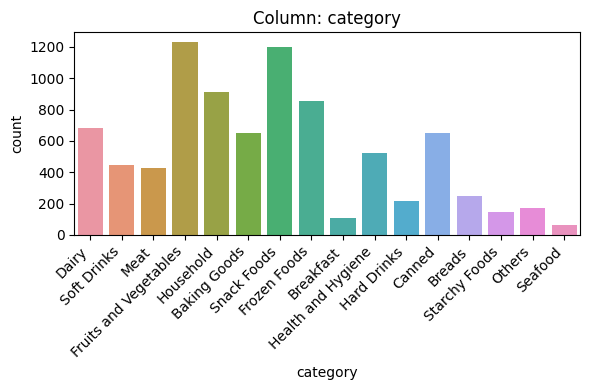

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [143]:
#plot categorical exploration EDA function
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 Null value found
  - Nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16 unique values.
  - High (>10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



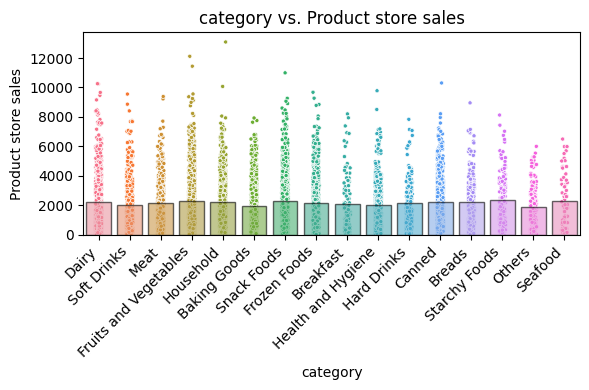

In [144]:
#Plot categorical VS TARGET EDA function
plot_categorical_vs_target(df,feature,'Product store sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I expect some categories would have higher product sales then others.

  - Does this feature appear to be a predictor of the target?
    - No, although there is little variability across category in terms of the means but the range of values for all categories extends below and above other categories.

___

### Max Retail Price

- Max Retail Price: Maximum Retail Price (list price) of the product

In [145]:
#check dtype
feature = "Max Retail Price"
df[feature].dtype

dtype('float64')

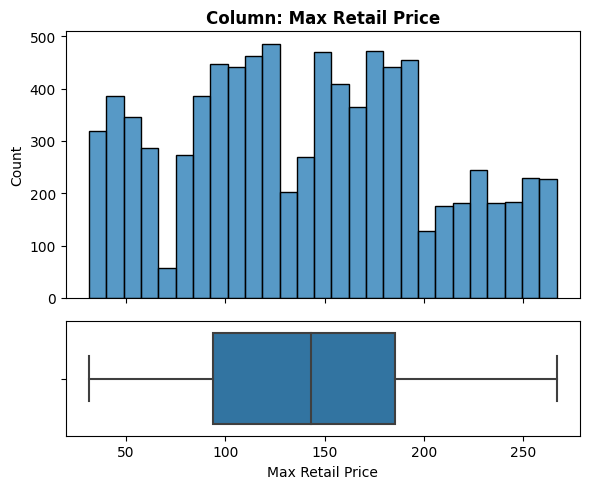

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [146]:
#Plot cnumerical exploration EDA function
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 Null value found
  - Nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



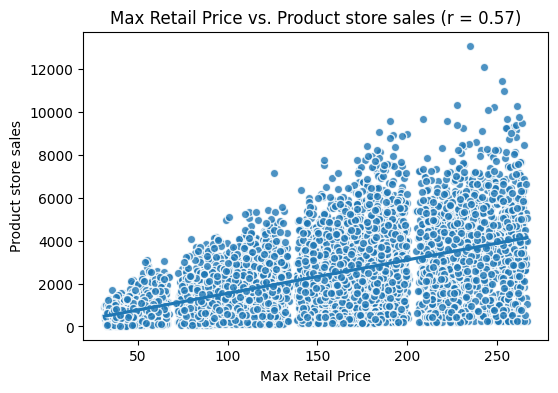

In [147]:
#Plot numerical VS TARGET EDA function
plot_numeric_vs_target(df,feature,'Product store sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I expect the higher the MRP would result in higher product sales.

  - Does this feature appear to be a predictor of the target?
    - Yes it does,there is a positive moderate correcation (.57) between the feature and target. As MRP increase the Product store sales increase. There are outliers on the high side may affect the overall trendline.

___

### StoreID

- StoreID: Outlet identifier

In [148]:
#check dtype
feature = "StoreID"
df[feature].dtype

dtype('O')

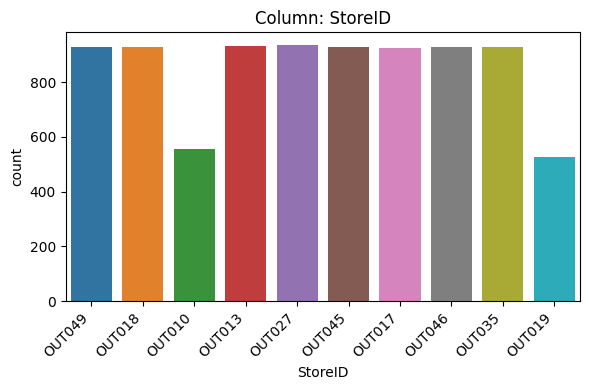

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [149]:
#Plot categorical exploration EDA function
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 Null value found
  - Nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 10 unique categories.
  - High cardinality (=>10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



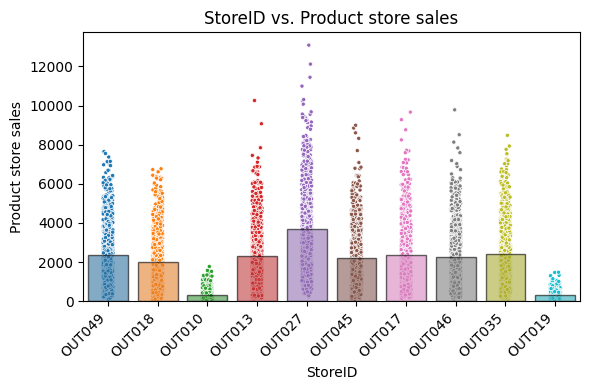

In [150]:
#Plot categorical VS TARGET EDA function
plot_categorical_vs_target(df,feature,'Product store sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I expect different stores have different properties that are unique to each other therefore may affect product sales.

  - Does this feature appear to be a predictor of the target?
    - Yes it does, there is variability between the stores in terms of means as well as the range of values.

___

### Year store established

- Year store established: The year in which store was established

In [165]:
#check dtype
feature = "Year store established"
df[feature].dtype

dtype('int64')

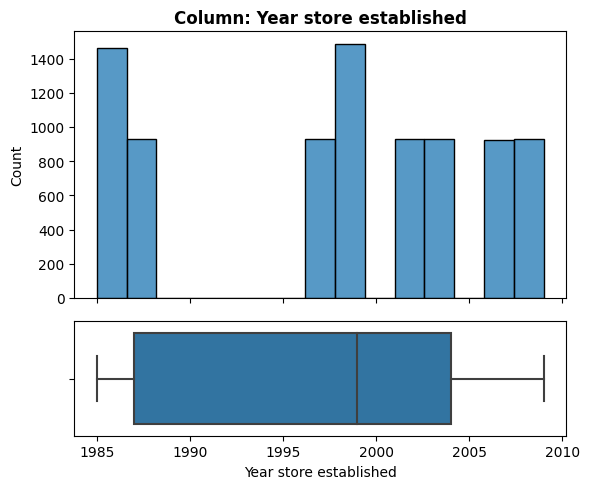

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [166]:
#Plot numerical exploration EDA function
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 Null value found
  - Nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



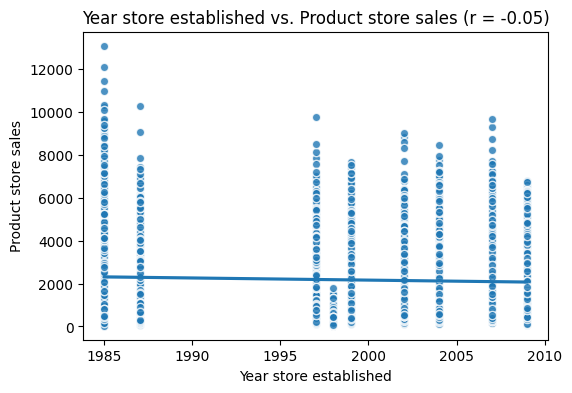

In [153]:
#Plot numerical VS TARGET EDA function
plot_numeric_vs_target(df,feature,'Product store sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No, I expect the 'Year store established' has nothing to do with product sales.
  - Does this feature appear to be a predictor of the target?
    - No, the correlation between 'Year store established' and 'product store sales' is -0.05, There is no relationship between the feature and target. Noticed there are many outliers.
___

### Size of the store

- Size of the store: The size of the store in terms of ground area covered.

In [154]:
#check dtype
feature = "Size of the store"
df[feature].dtype

dtype('O')

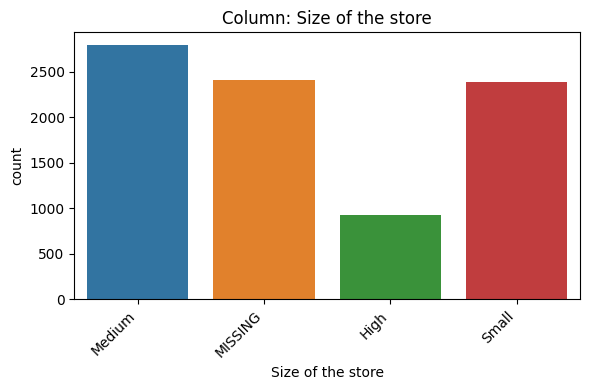

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [155]:
#Plot categorical exploration EDA function
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 Null value found (28.28%)
  - Unable to find the cause of the Nulls
  - Impute with 'MISSING' as the placeholder

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique values.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



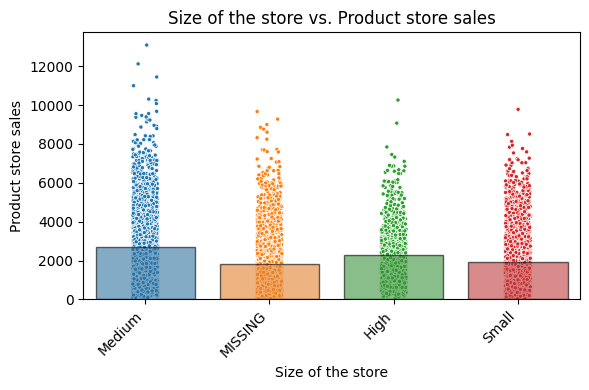

In [156]:
#Plot categorical VS TARGET EDA function
plot_categorical_vs_target(df,feature,'Product store sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I expect the greater the size of the store would result in higher product sales.

  - Does this feature appear to be a predictor of the target?
    - No, although there is variablity across different size of the stores in terms of average sales but the range of value of all categories extends below and above other categories. Noticed there are large numbers of 'MISSING' values.

___

### Outlet Location Type




- Outlet Location Type: The type of area in which the store is located

In [157]:
#check dtype
feature = "Outlet Location Type"
df[feature].dtype

dtype('O')

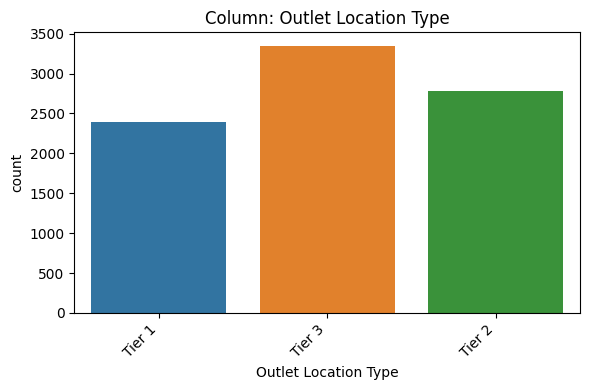

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [158]:
#Plot categorical exploration EDA function
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal) or ordinal
  - Need more clarification from the company on how locations/areas are allocated into tiers. Does it have any ordering involved?

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 Null values
  - Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3 unique values.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



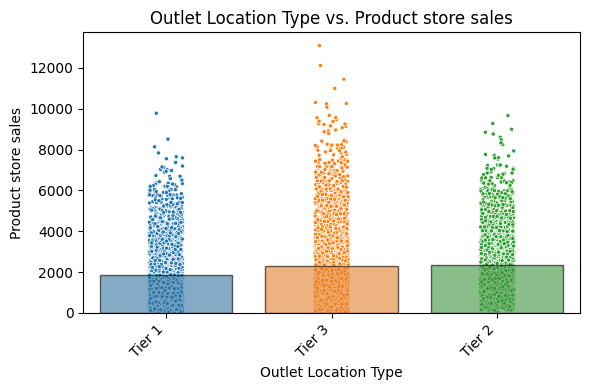

In [159]:
#lot categorical VS TARGET EDA function
plot_categorical_vs_target(df,feature,'Product store sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I expect store in certain areas would have higher sales then the stores in other area.

  - Does this feature appear to be a predictor of the target?
    - No, There is small variablity across 'outlet location type' in terms of average sales but the range of values for ALL location types extends below and above other location types.

___

### Outlet Type

- Outlet Type: Whether the outlet is a grocery store or some sort of supermarket

In [160]:
#check dtype
feature = "Outlet Type"
df[feature].dtype

dtype('O')

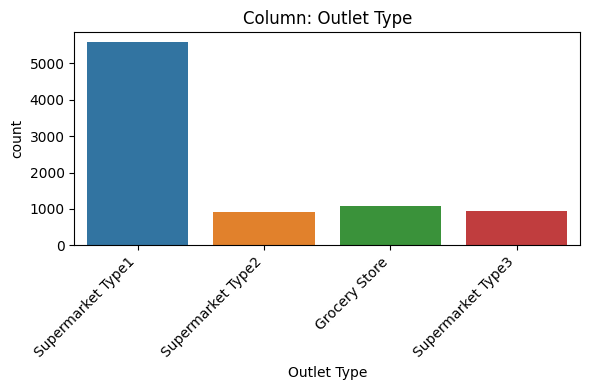

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [161]:
#Plot categorical exploration EDA function
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 Null value found
  - Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



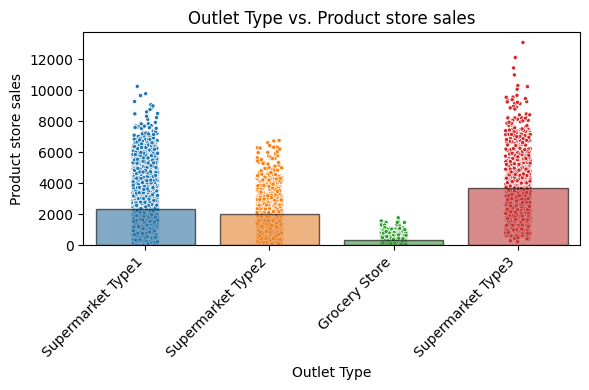

In [162]:
#Plot categorical VS TARGET EDA function
plot_categorical_vs_target(df,feature,'Product store sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I expect there would be different in terms of product sales by outlet types.

  - Does this feature appear to be a predictor of the target?
    - Yes, there is variability between the outlet typs in terms of average sales as well as the range of values. Noticed the range of value of supermarket type extends below and above other outlet type.

___

### ProductID

- ProductID: Item identifier

In [167]:
#check dtype
feature = "ProductID"
df[feature].dtype

dtype('O')

In [171]:
#Plot categorical exploration EDA function
#explore_categorical(df,feature,figsize=(100,100));

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 Null value.
  - Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 1559 unique values.
  - Very high cardinality.
  - Not useful for machine learning.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, productID has 1559 unique values, cardinality is too hight for ML.



### Product store sales (TARGET)

  - Product store sales: Sales of the product in the particular store. This is the target variable to be predicted.

In [163]:
#check dtype
feature = "Product store sales"
df[feature].dtype

dtype('float64')

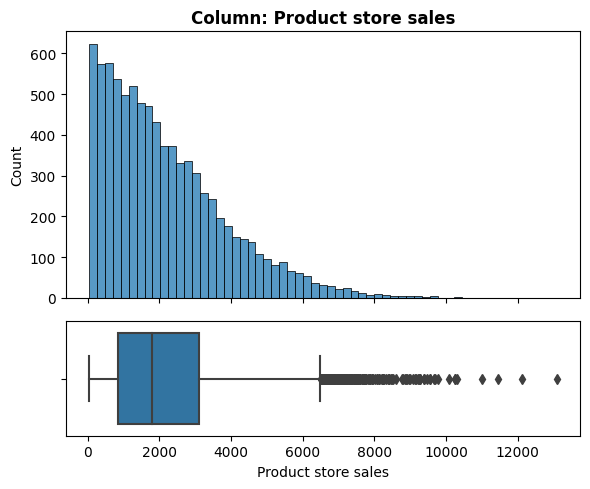

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [164]:
#plot numerical exploration EDA function
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 Null value found
  - Nothing to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes, since it is the TARGET.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, its our target.

